# Make a catalog to cross-match to for astrometry

Gaia does not seem to have enough stars, nor  does 2MASS

VVV does, but the matches aren't good enough, so we need to use our own...

In [1]:
import numpy as np

In [2]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from astropy.table import Table
from astropy.io import fits
from astropy import wcs
from astropy.wcs import WCS
import regions
from astroquery.vizier import Vizier

Archive will be down on 07-02-2023 from 10:00 am to 11:00 (CET) 


In [3]:
from astropy.visualization import quantity_support

In [4]:
%matplotlib inline
import pylab as pl

In [5]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [6]:
fov = regions.Regions.read(f'{basepath}/regions/nircam_fov.reg')

In [7]:
coord = fov[0].center
height = fov[0].height
width = fov[0].width
height, width = width, height # CARTA wrote it wrong
coord, width, height

(<SkyCoord (ICRS): (ra, dec) in deg
     (266.53496367, -28.71007499)>,
 <Quantity 161.9038 arcsec>,
 <Quantity 391.024 arcsec>)

In [8]:
Gaia.ROW_LIMIT = 10000
rslt = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]


In [9]:
gaiacrds = SkyCoord(rslt['ra'], rslt['dec'], frame='icrs')
len(gaiacrds)

306

In [10]:
regs = regions.Regions([regions.PointSkyRegion(crd) for crd in gaiacrds])

In [11]:
regs.write(f'{basepath}/regions/gaia_sources.reg', overwrite=True)

In [12]:
Vizier.find_catalogs('2MASS Point Source')

OrderedDict([('II/246', </>), ('II/281', </>), ('J/ApJS/184/138', </>)])

In [13]:
Vizier.ROW_LIMIT = 5e4

In [14]:
galnuc2019 = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['J/A+A/631/A20'])[0]
galnuc2019[:3]

RAJ2000,e_RAJ2000,DEJ2000,e_DEJ2000,RAJdeg,e_RAJdeg,DEJdeg,e_DEJdeg,RAHdeg,e_RAHdeg,DEHdeg,e_DEHdeg,RAKsdeg,e_RAKsdeg,DEKsdeg,e_DEKsdeg,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,iJ,iH,iKs
deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,mag,mag,mag,mag,mag,mag,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,uint8,uint8,uint8
266.51151,0.000000000,-28.757747,0.000000000,266.51151,0.001987759,-28.757747,0.002155650,266.51151,0.001987759,-28.757747,0.002155650,266.51151,0.001987759,-28.757747,0.002155650,12.67029,0.00486,12.22915,0.01243,12.19240,0.01123,2,2,2
266.52640,0.001296887,-28.748615,0.001615686,266.52640,0.001919700,-28.748616,0.002009142,266.52640,0.001989142,-28.748614,0.002159149,266.52640,--,-28.748615,--,13.64379,0.00700,12.82945,0.01289,12.60900,0.01718,2,2,2
266.52081,0.000648459,-28.747770,0.000807829,266.52081,0.001160735,-28.747769,--,266.52081,--,-28.747770,--,266.52081,--,-28.747770,--,14.04259,0.00401,13.46765,0.01227,13.46750,0.01181,2,2,2


In [15]:
galnuc2021 = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['J/A+A/653/A133'])[0]
galnuc2021[:3]

RAJ2000,e_RAJ2000,DEJ2000,e_DEJ2000,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,FJH,FHK,AJ1JH,e_AJ1JH,AH1JH,e_AH1JH,AH1HK,e_AH1HK,AK1HK,e_AK1HK,AH2HK,e_AH2HK,AK2HK,e_AK2HK
deg,arcsec,deg,arcsec,mag,mag,mag,mag,mag,mag,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
266.51151,0.000000000,-28.757747,0.000000000,12.67029,0.00486,12.22915,0.01243,12.19240,0.01123,1,1,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000
266.52640,0.001296887,-28.748615,0.001615686,13.64379,0.00700,12.82945,0.01289,12.60900,0.01718,1,1,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000
266.52081,0.000648459,-28.747770,0.000807829,14.04259,0.00401,13.46765,0.01227,13.46750,0.01181,1,1,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000


In [16]:
# FK5 because it says 'J2000' on the Vizier page (same as twomass)
galnuc2021_crds = SkyCoord(galnuc2021['RAJ2000'], galnuc2021['DEJ2000'], frame='fk5')

In [17]:
vvvdr2 = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['II/348/vvv2'])[0]
vvvdr2[:3]
len(vvvdr2)

4693

In [18]:
vvvdr2.write(f'{basepath}/regions/vvvdr2.fits', overwrite=True)

In [19]:
# FK5 because it says 'J2000' on the Vizier page (same as twomass)
vvvdr2_crds = SkyCoord(vvvdr2['RAJ2000'], vvvdr2['DEJ2000'], frame='fk5')

In [20]:
Vizier.ROW_LIMIT = 1e4
twomass = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['II/246'])[0]
twomass[:3]

RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,
float64,float64,str17,float32,float32,float32,float32,float32,float32,str3,str3,str3,str3,uint8,uint8
266.546943,-28.752007,17461126-2845072,14.314,--,13.123,0.103,10.854,--,UAU,020,010,000,0,0
266.543681,-28.762333,17461048-2845443,16.551,--,13.405,0.074,11.001,0.043,UBA,022,011,0c0,0,0
266.543638,-28.753548,17461047-2845127,17.043,--,14.264,--,13.001,0.114,UUB,002,003,00c,0,0


In [21]:
twomass.meta['description'] = '2MASS Point Source Catalog'

In [22]:
twomass.write(f'{basepath}/regions/twomass.fits', overwrite=True)

In [23]:
# FK5 because it says 'J2000' on the Vizier page
twomass_crds = SkyCoord(twomass['RAJ2000'], twomass['DEJ2000'], frame='fk5')

# Test cross-match (to be put in the pipeline when it works)

In [24]:
from astropy.table import Table

In [25]:
filtername = 'f212n'
module = 'nrca'
catfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_cat.ecsv'
imfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_i2d.fits'
cat = Table.read(catfile)
cat.write(catfile.replace('ecsv', 'fits'), overwrite=True) # for CARTA viewing

In [26]:
cat[:3]

label,xcentroid,ycentroid,sky_centroid,aper_bkg_flux,aper_bkg_flux_err,aper30_flux,aper30_flux_err,aper50_flux,aper50_flux_err,aper70_flux,aper70_flux_err,aper_total_flux,aper_total_flux_err,aper30_abmag,aper30_abmag_err,aper50_abmag,aper50_abmag_err,aper70_abmag,aper70_abmag_err,aper_total_abmag,aper_total_abmag_err,aper30_vegamag,aper30_vegamag_err,aper50_vegamag,aper50_vegamag_err,aper70_vegamag,aper70_vegamag_err,aper_total_vegamag,aper_total_vegamag_err,CI_50_30,CI_70_50,CI_70_30,is_extended,sharpness,roundness,nn_label,nn_dist,isophotal_flux,isophotal_flux_err,isophotal_abmag,isophotal_abmag_err,isophotal_vegamag,isophotal_vegamag_err,isophotal_area,semimajor_sigma,semiminor_sigma,ellipticity,orientation,sky_orientation,sky_bbox_ll,sky_bbox_ul,sky_bbox_lr,sky_bbox_ur
,,,"deg,deg",Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,,,,,,,,,,,,,,,,,,,,,,,,pix,Jy,Jy,,,,,pix2,pix,pix,,deg,deg,"deg,deg","deg,deg","deg,deg","deg,deg"
int64,float64,float64,SkyCoord,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float32,int64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,SkyCoord,SkyCoord,SkyCoord,SkyCoord
1,5445.2047,9.3361,"266.5120152176591,-28.71582601492996",1.388174e-06,1.623235e-07,6.148267e-04,5.100096e-06,1.485196e-03,8.074404e-06,4.424693e-03,1.396384e-05,6.465803e-03,2.040536e-05,16.928118,0.008969,15.970541,0.005887,14.785292,0.003421,14.373444,0.003421,15.096908,0.008969,14.139331,0.005887,12.954082,0.003421,12.542234,0.003421,2.4156,2.9792,7.1967,True,0.476093,0.576114,4,28.183979,5.874815e-03,1.666945e-05,14.477515,0.003076,12.646305,0.003076,858.0,4.477954,3.073243,0.313695,56.283123,235.681511,"266.5119394915252,-28.716007105666176","266.5123070550851,-28.71600378388664","266.5119349880889,-28.715623761436987","266.5123025503008,-28.71562043966887"
2,5833.4761,14.4641,"266.512026417053,-28.71244279172845",7.151818e-07,1.443727e-07,2.965007e-06,5.901453e-07,7.795962e-06,9.183730e-07,2.153099e-05,2.066049e-06,3.146323e-05,3.019117e-06,22.719936,0.197081,21.670326,0.120911,20.567340,0.099484,20.155492,0.099484,20.888726,0.197081,19.839116,0.120911,18.736130,0.099484,18.324282,0.099484,2.6293,2.7618,7.2617,True,0.579915,-1.292555,57,30.565871,6.615168e-03,1.648954e-05,14.348648,0.002703,12.517438,0.002703,1264.0,14.290738,3.171612,0.778065,50.633907,230.032296,"266.51190090633554,-28.712722542672914","266.5123479290472,-28.712718502659186","266.5118940492745,-28.71213881398655","266.51234106948976,-28.712134773993974"
3,5724.4336,6.2279,"266.511955760374,-28.713393548782335",9.512133e-08,2.269542e-08,2.979210e-05,9.583328e-07,8.121463e-05,1.568204e-06,2.105485e-04,2.733258e-06,3.076745e-04,3.994110e-06,20.214747,0.034375,19.125914,0.020765,18.091620,0.014004,17.679771,0.014004,18.383537,0.034375,17.294704,0.020765,16.260410,0.014004,15.848561,0.014004,2.7260,2.5925,7.0673,True,0.327245,0.637648,41,12.510196,3.197348e-04,4.721092e-06,17.638025,0.015914,15.806815,0.015914,250.0,6.262294,2.067952,0.669777,-0.646476,178.751912,"266.5119200513465,-28.71350656607852","266.5120789939509,-28.713505129775847","266.5119157527821,-28.713140646599204","266.5120746948301,-28.713139210301243"


In [27]:
skycrds_cat = cat['sky_centroid']

In [28]:
idx, sidx, sep, sep3d = gaiacrds.search_around_sky(skycrds_cat, 0.2*u.arcsec)

In [29]:
len(idx)

111

In [30]:
dra = (skycrds_cat[idx].ra - gaiacrds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[idx].dec - gaiacrds[sidx].dec).to(u.arcsec)

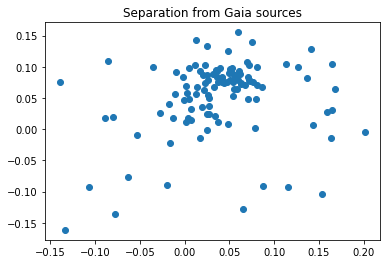

In [31]:
pl.title("Separation from Gaia sources")
pl.scatter(dra, ddec);

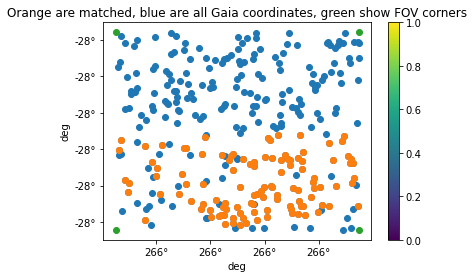

In [32]:
with quantity_support():
    pl.scatter(gaiacrds.ra, gaiacrds.dec)
    pl.scatter(gaiacrds.ra[sidx], gaiacrds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()
    pl.title("Orange are matched, blue are all Gaia coordinates, green show FOV corners")

In [33]:
idx, sidx, sep, sep3d = twomass_crds.search_around_sky(skycrds_cat, 0.2*u.arcsec)

In [34]:
len(idx)

161

In [35]:
dra = skycrds_cat[idx].ra - twomass_crds[sidx].ra
ddec = skycrds_cat[idx].dec - twomass_crds[sidx].dec

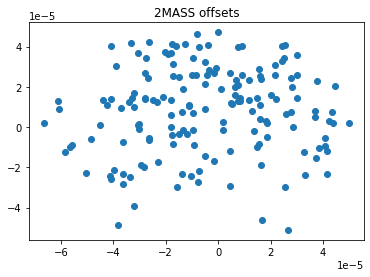

In [36]:
pl.title("2MASS offsets")
pl.scatter(dra, ddec);

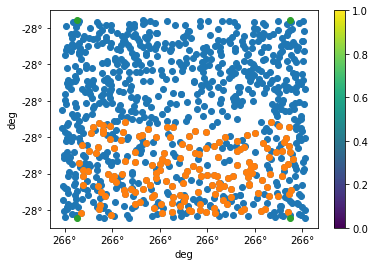

In [37]:
with quantity_support():
    pl.scatter(twomass_crds.ra, twomass_crds.dec)
    pl.scatter(twomass_crds.ra[sidx], twomass_crds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

In [38]:
idx, sidx, sep, sep3d = galnuc2021_crds.search_around_sky(skycrds_cat, 0.2*u.arcsec)

In [39]:
len(idx)

11626

In [40]:
dra = (skycrds_cat[idx].ra - galnuc2021_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[idx].dec - galnuc2021_crds[sidx].dec).to(u.arcsec)

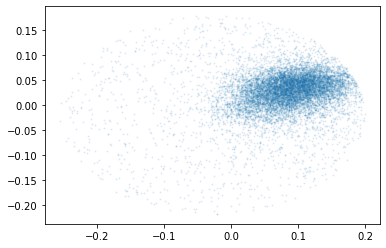

In [41]:
pl.scatter(dra, ddec, s=1, alpha=0.1)

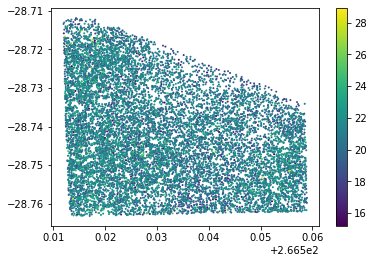

In [42]:
pl.scatter(skycrds_cat[idx].ra, skycrds_cat[idx].dec, c=cat['aper30_abmag'][idx], s=1)
pl.colorbar()

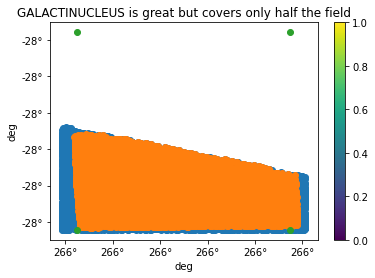

In [43]:
with quantity_support():
    pl.scatter(galnuc2021_crds.ra, galnuc2021_crds.dec)
    pl.scatter(galnuc2021_crds.ra[sidx], galnuc2021_crds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()
    pl.title("GALACTINUCLEUS is great but covers only half the field")

# VVV offsets

In [44]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat, 0.2*u.arcsec)

In [45]:
len(idx)

1433

In [46]:
dra = (skycrds_cat[idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

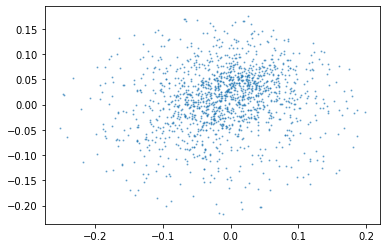

In [47]:
pl.scatter(dra, ddec, s=1, alpha=0.5)

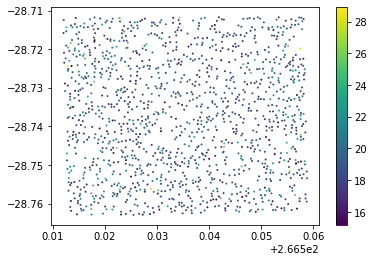

In [48]:
pl.scatter(skycrds_cat[idx].ra, skycrds_cat[idx].dec, c=cat['aper30_abmag'][idx], s=1)
pl.colorbar()

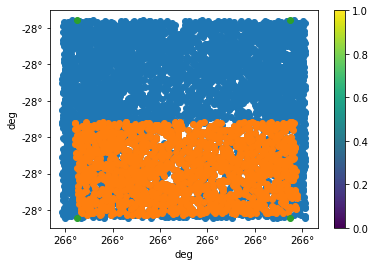

In [49]:
with quantity_support():
    pl.scatter(vvvdr2_crds.ra, vvvdr2_crds.dec)
    pl.scatter(vvvdr2_crds.ra[sidx], vvvdr2_crds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

# VVV

VVV looks pretty good superposed on the images.

The offset is generally <0.2 arcsec, often <0.1, but there's a systematic shift.

The flux range that matches is:

F187N : ~ 500 - 3000 MJy/sr

F182M, F212N: seems ~same-ish

Actually looks same-ish for the long wave too

Argh, what's the MJy/sr conversion?

In [50]:
from astropy.wcs import WCS
from astropy.io import fits

In [51]:
ww =  WCS(fits.getheader(imfile, ext=('SCI', 1)))
pixscale = ww.proj_plane_pixel_area()

Set DATE-AVG to '2022-08-28T02:01:42.809' from MJD-AVG.
Set DATE-END to '2022-08-28T02:29:48.969' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.664510 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526442456.371 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [52]:
import numpy as np

## Approximate Jy/beam

In [53]:
(u.MJy/u.sr * (2*np.pi * (8*np.log(2)) * 2.5**2 * pixscale)).to(u.Jy)

<Quantity 5.03557252e-06 Jy>

but that doesn't seem to work.

Empirically,

8.5e-5 Jy -> 1933 MJy/sr
1.1e-5 Jy ->  165 MJy/sr
2.1e-5 Jy ->  350 MJy/sr

So there are ~70 nJy / (MJy/sr)

In [54]:
1.1e-5 / 165

6.666666666666667e-08

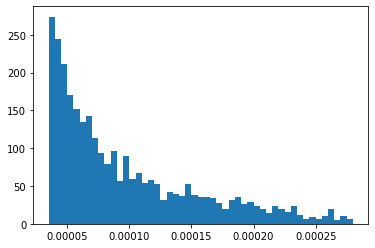

In [55]:
flux = (cat['aper30_abmag'].value * u.ABmag).to(u.Jy)
pl.hist(flux.value, bins=np.linspace(7e-8 * 500, 7e-8 * 4000))
sel = (flux > 7e-8*500*u.Jy) & (flux < 4000*7e-8*u.Jy)

In [56]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat[sel], 0.4*u.arcsec)

In [57]:
len(idx)

855

In [58]:
dra = (skycrds_cat[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

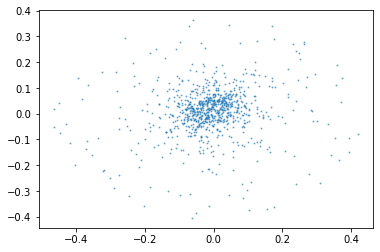

In [59]:
pl.scatter(dra, ddec, s=1, alpha=0.5)

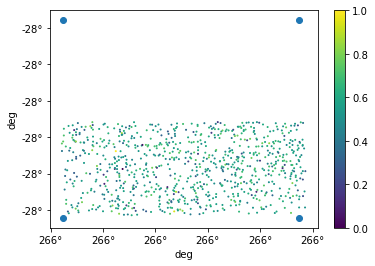

In [60]:
with quantity_support():
    pl.scatter(skycrds_cat[sel][idx].ra, skycrds_cat[sel][idx].dec, c=cat['aper30_abmag'][idx], s=1)
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

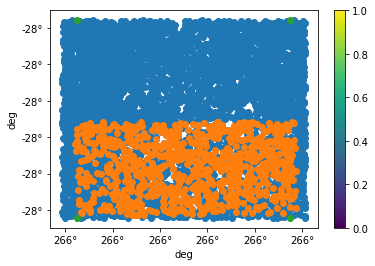

In [61]:
with quantity_support():
    pl.scatter(vvvdr2_crds.ra, vvvdr2_crds.dec)
    pl.scatter(vvvdr2_crds[sidx].ra, vvvdr2_crds[sidx].dec)
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

In [62]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat[sel], 0.4*u.arcsec)
dra = (skycrds_cat[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

-0.0120211arcsec 0.0159569arcsec


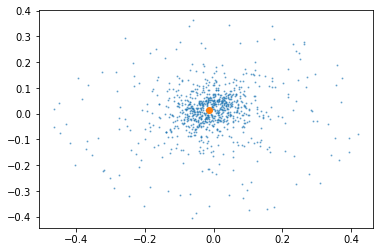

In [63]:
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec))

In [64]:
ww =  WCS(fits.getheader(imfile, ext=('SCI', 1)))
ww.wcs.crval = ww.wcs.crval - [np.median(dra).to(u.deg).value, np.median(ddec).to(u.deg).value]
with fits.open(imfile, mode='update') as hdulist:
    print(hdulist[1].header['CRVAL1'],
          hdulist[1].header['CRVAL2'])
    hdulist[1].header.update(ww.to_header())
    print(hdulist[1].header['CRVAL1'],
          hdulist[1].header['CRVAL2'])

266.5354759173069 -28.73739369930859
266.5354792565 -28.737398131781


Set DATE-AVG to '2022-08-28T02:01:42.809' from MJD-AVG.
Set DATE-END to '2022-08-28T02:29:48.969' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.664510 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526442456.371 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


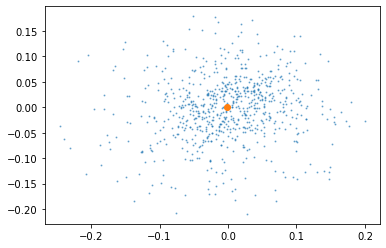

In [65]:
skycrds_cat_new = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat_new[sel], 0.2*u.arcsec)
dra = (skycrds_cat_new[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat_new[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec))

# Check what's happening in the overlap zones

In [66]:
from astropy import wcs

In [67]:
import regions
module_overlap = regions.Regions.read(f'{basepath}/regions/overlap_region.reg')
module_overlap

<Regions([<RectangleSkyRegion(center=<SkyCoord (ICRS): (ra, dec) in deg
    (266.535674, -28.71300934)>, width=11.3759 arcsec, height=150.5041 arcsec, angle=0.0 deg)>])>

In [68]:
import warnings

In [69]:
def check_overlap_zone(filtername = 'f212n'):
    fig = pl.figure(1, figsize=(10,5))
    pl.suptitle(filtername)
    
    ax1 = pl.subplot(1,2,1)
    ax2 = pl.subplot(1,2,2)

    for module in ('nrca', 'nrcb'):
        catfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_cat.ecsv'
        imfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_i2d.fits'
        cat = Table.read(catfile)
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            ww = wcs.WCS(fits.getheader(imfile, ext=('SCI', 1)))
        
        skycrds_cat = cat['sky_centroid']
        realigned_skycrds = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])
        
        for crds, ax, title in [(skycrds_cat, ax1, 'original'),
                                (realigned_skycrds, ax2, 'realigned')]:
            ax.set_title(title)
            sel = module_overlap[0].contains(crds, ww)

            idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(crds, 0.3*u.arcsec)

            dra_all = (crds[idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
            ddec_all = (crds[idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

            idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(crds[sel], 0.3*u.arcsec)

            dra = (crds[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
            ddec = (crds[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

            ax.axhline(0, color='k', linestyle=':')
            ax.axvline(0, color='k', linestyle=':')
            ax.scatter(dra_all, ddec_all, s=1, alpha=0.2, label=module)
            ax.scatter(dra, ddec, s=3, alpha=0.5, marker='s', label=module)
            ax.scatter(np.median(dra), np.median(ddec), marker='x', s=100)
            ax.axis([-0.3, 0.3, -0.3, 0.3])
    return fig

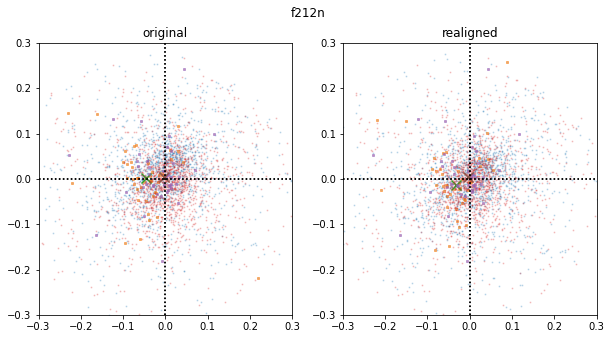

In [70]:
check_overlap_zone('f212n');

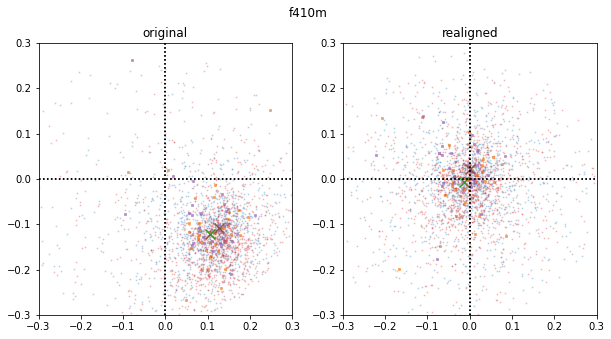

In [71]:
check_overlap_zone('f410m');

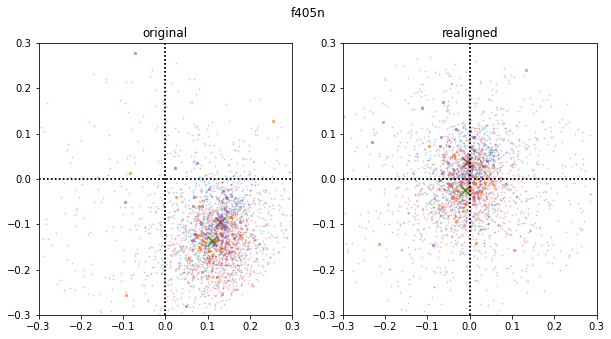

In [72]:
check_overlap_zone('f405n');

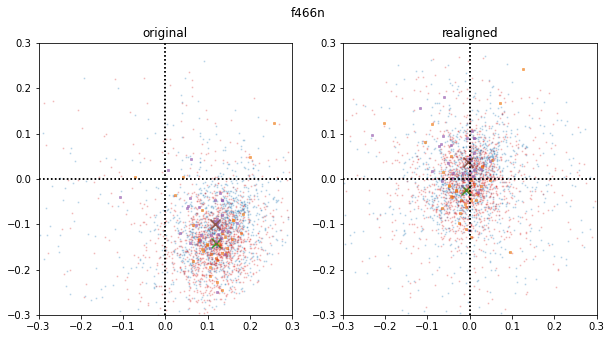

In [73]:
check_overlap_zone('f466n');

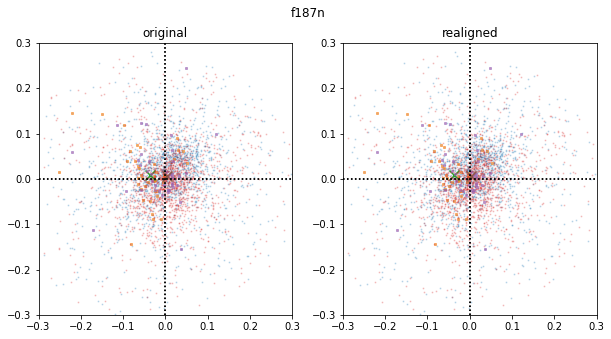

In [74]:
check_overlap_zone('f187n');

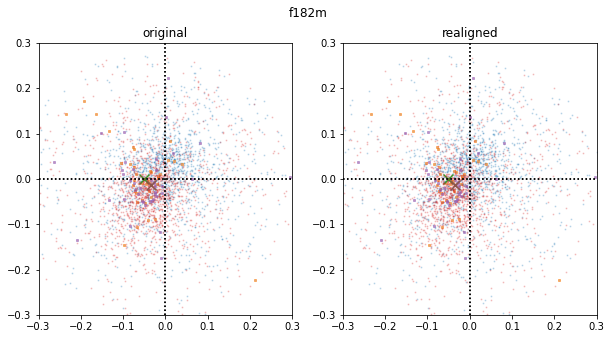

In [75]:
check_overlap_zone('f182m');

# "Production Run" test 

In [76]:
%run $basepath/reduction/align_to_catalogs.py

<Figure size 432x288 with 0 Axes>

In [77]:
realign_to_vvv()

Before realignment, offset is -0.0003342146783325006 arcsec, 0.00021204574736088944 arcsec
CRVAL before 266.5354792565 -28.737398131781
CRVAL after 266.53547934934 -28.737398190683
After realignment, offset is -0.0019021744947167463 arcsec, 5.1717977100906865e-05 arcsec
CRVAL before 266.53547934934 -28.737398190683
CRVAL after 266.53547987772 -28.737398205049
After re-realignment, offset is -4.1950443119276315e-09 arcsec, 3.517186542012496e-10 arcsec


[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2ad9bc8c8400>, <astropy.io.fits.hdu.image.ImageHDU object at 0x2ad9bc75fe80>, <astropy.io.fits.hdu.image.ImageHDU object at 0x2ad9c6629ca0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x2ad9c66293d0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x2ad9c6629f10>, <astropy.io.fits.hdu.image.ImageHDU object at 0x2ad9c6629dc0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x2ad9bca47970>, <astropy.io.fits.hdu.image.ImageHDU object at 0x2ad9bca475e0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2ad9bca474c0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2ad9bca47250>]

In [78]:
main()

f182m nrca
Before realignment, offset is -0.012652284749492537 arcsec, 0.013050685102200532 arcsec
CRVAL before 266.5354751715248 -28.73739353249968
CRVAL after 266.53547868605 -28.73739715769
After realignment, offset is -0.0012079046882718103 arcsec, 0.0006157897615821639 arcsec
CRVAL before 266.53547868605 -28.73739715769
CRVAL after 266.53547902158 -28.737397328743
After re-realignment, offset is -4.113189788768068e-08 arcsec, -1.0615508472255897e-09 arcsec
f182m nrcb
Before realignment, offset is -0.03544450094068452 arcsec, -0.022990311082082826 arcsec
CRVAL before 266.5355128303474 -28.68887687158038
CRVAL after 266.53552267604 -28.688870485383
After realignment, offset is -0.0015690556438130443 arcsec, -0.0015766175437192942 arcsec
CRVAL before 266.53552267604 -28.688870485383
CRVAL after 266.53552311189 -28.688870047434
After re-realignment, offset is 1.0149960871785879e-07 arcsec, -1.1638690011750441e-09 arcsec
f187n nrca
Before realignment, offset is -0.00031030405125420657 

In [79]:
%run $basepath/reduction/align_to_catalogs.py

In [80]:
merge_a_plus_b('f410m')

Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [81]:
merge_a_plus_b('f212n', parallel=True)

Set OBSGEO-B to   -20.664510 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526442456.371 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.665528 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526454427.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.664510 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526442456.371 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/blue/adamginsburg/adamginsburg/repos/reproject/reproject/spherical_intersect/core.py:47: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  warnings.warn("The reproject_exact function currently has precision "
/blue/adamginsburg/adamginsburg/repos/reproject/reproject/spherical_intersect/core.py:47: UserWarning: The reproject_exact function currently has precision issues with images that have resolutions below ~0.05 arcsec, so the results may not be accurate.
  warnings.warn("The reproject_exact function currently has precision "

# TEST aligning using tweakreg

In [82]:
from tweakwcs import JWSTgWCS, align_wcs, JWSTWCSCorrector, FITSWCSCorrector
from astropy.table import Table
from jwst.datamodels import ImageModel

# to update FITS WCS of the data models next import
# requires installing dev version of the pipeline
from jwst.assign_wcs.util import update_fits_wcsinfo


# This only works with L2 files

In [83]:
dm1 = ImageModel(imfile)
dm1.meta.wcs.available_frames

['detector', 'world']

In [84]:
imcat1 = cat
imcat1['x'] = imcat1['xcentroid']
imcat1['y'] = imcat1['ycentroid']
refcat = vvvdr2
refcat['RA'] = refcat['RAJ2000']
refcat['DEC'] = refcat['DEJ2000']

corr1 = FITSWCSCorrector(dm1.get_fits_wcs(),# dm1.meta.wcsinfo.instance,
                 meta={'catalog': imcat1, 'group_id': 1})

# align images to the reference catalog:
aligned_cat = align_wcs([corr1,], refcat=refcat) # + add other arguments as needed - see docs

2023-02-05 19:58:19,111 - stpipe - WARNING - /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.528470 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.664510 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526442456.371 from OBSGEO-[XYZ]'.
  warnings.warn(

2023-02-05 19:58:19,112 - stpipe - INFO -  
2023-02-05 19:58:19,113 - stpipe - INFO - ***** tweakwcs.imalign.align_wcs() started on 2023-02-05 19:58:19.112679
2023-02-05 19:58:19,114 - stpipe - INFO -       Version 0.8.1
2023-02-05 19:58:19,115 - stpipe - INFO -  
2023-02-05 19:58:19,836 - stpipe - INFO - Aligning image catalog 'GROUP ID: 1' to the reference catalog.
2023-02-05 19:58:19,848 - stpipe - INFO - Matching sources from 'Unknown' catalog with sources from the reference 'II/348/vvv2' catalog.
2023-02-05 19:58:19,849 - stpipe - INFO - Computing initial guess for X and Y shifts...
2023-02-05 19:58:21,066 - stpipe - INFO - Found initi

dm1.meta.wcs = corr1.wcs
update_fits_wcsinfo(dm1, npoints=16) # <- update FITS WCS too (optionally). Repeat for each model below

# save image models to different files but one can also overwrite existing models:
#dm1.write(imfile.replace(".fits", "_wcscorrected_vvv.fits"))

# Crossmatch F212N with VVV, then we'll save that and use it as our reference case


Work done Oct 20, 2022

Idea is to establish a new and *usable* master table, since VVV stars are mostly saturated in JW.

In [86]:
basepath = '/blue/adamginsburg/adamginsburg/jwst/brick'

In [87]:
cd $basepath

/blue/adamginsburg/adamginsburg/jwst/brick


In [88]:
filtername = 'f212n'
module = 'nrca'
catfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_cat.ecsv'
imfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_i2d.fits'
cat = Table.read(catfile)
#cat.write(catfile.replace('ecsv', 'fits'), overwrite=True) # for CARTA viewing

Catalogs:

 * F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_cat.ecsv
 * F212N/f212n_?merged?_crowdsource.fits doesn't exist yet
 * F212N/f212n_?merged?_daophot_iterative.fits doesn't exist yet

In [89]:
# TODO: replace nrca w/full

crowdtbl = Table.read('F212N/f212n_nrca_crowdsource.fits')
crowdheader = fits.getheader('F212N/f212n_nrca_crowdsource.fits')
daobasictbl = Table.read('F212N/f212n_nrca_daophot_basic.fits')
daoitertbl = Table.read('F212N/f212n_nrca_daophot_iterative.fits')
len(crowdtbl), len(daobasictbl), len(daoitertbl)

(152674, 128686, 161311)

In [90]:
if 'skycoord' not in crowdtbl.colnames:
    print ("Swapping coords")
    # I've now fixed crowdtbl to include skycoord, but it hasn't run yet
    ww = wcs.WCS(crowdheader)
    # crowdtbl are still backwards now
    crowdtbl['skycoord'] = ww.pixel_to_world(crowdtbl['y'], crowdtbl['x'])

In [91]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(daobasictbl['skycoord_centroid'], 0.5*u.arcsec)
dra = (daobasictbl['skycoord_centroid'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (daobasictbl['skycoord_centroid'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

-0.0214254arcsec -0.0149147arcsec


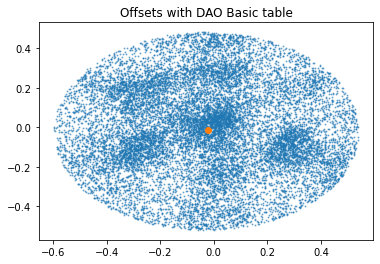

In [92]:
pl.title("Offsets with DAO Basic table")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec));

In [93]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(daoitertbl['skycoord_centroid'], 0.5*u.arcsec)
dra = (daoitertbl['skycoord_centroid'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (daoitertbl['skycoord_centroid'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

-0.0265499arcsec -0.0174674arcsec


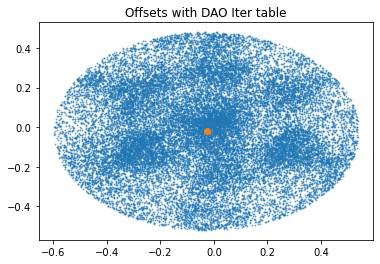

In [94]:
pl.title("Offsets with DAO Iter table")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec));

In [95]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(crowdtbl['skycoord'], 0.5*u.arcsec)
dra = (crowdtbl['skycoord'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (crowdtbl['skycoord'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

-0.0185652arcsec -0.0130552arcsec


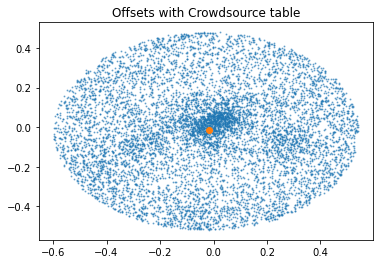

In [96]:
pl.title("Offsets with Crowdsource table")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec));

### Intermediate conclusions:

The iter table performed best but still quite poorly.  Only matches within <0.15 arcsec are remotely valid, so more source rejection is needed to get a good result.

In [97]:
satstarcat = Table.read('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d_satstar_catalog.fits')
if 'skycoord_fit' not in satstarcat.colnames:
    ww = WCS(fits.getheader('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d.fits', ext=('SCI', 1)))
    satstarcat['skycoord_fit'] = ww.pixel_to_world(satstarcat['x_fit'], satstarcat['y_fit'])
    satstarcat.write('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d_satstar_catalog.fits', overwrite=True)
satstarcat[:5]

x_0,y_0,flux_0,id,group_id,x_fit,y_fit,flux_fit,flux_unc,x_0_unc,y_0_unc,skycoord_fit
,,,,,,,,,,,"deg,deg"
float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,SkyCoord
4331.580246913581,2430.543209876543,4692292.664740454,1,1,4333.509210200824,2431.5681762455106,25722554.336474825,84260.6463433766,0.004641435038153716,0.004657132263340242,"266.5360675051915,-28.725124055743454"
6184.138888888889,2459.027777777778,2104352.069079362,1,1,6185.2121314358,2459.00775085794,12636947.677892487,27587.73279741156,0.0028834528557805912,0.0030911443965695225,"266.53594199194913,-28.709011156621354"
6912.103448275862,3572.2413793103447,1633015.7910213778,2,2,6912.689228572919,3572.239983020334,9379745.147764899,18347.17668610022,0.0023409550186267443,0.0022880392669205212,"266.5468262389749,-28.702472816723404"
5405.5,128.0,475881.0659013706,1,1,5405.730360225119,127.9579744232393,1340901.0433892203,26203.229301907828,0.03106393978978386,0.026386253929317125,"266.5129882125096,-28.71622887663567"
9747.285714285714,257.5,861437.1200121259,2,2,9746.611720644889,257.28450801140093,2451439.690301492,17996.97610636004,0.012744261355983654,0.00960824615193339,"266.513346894016,-28.678443802395552"


### Try to reject sources near saturated sources (about 0.4" in F4* and 0.95" (?!?!) in F1*)

In [100]:
satcrd = satstarcat['skycoord_fit']
daoitercrd = daoitertbl['skycoord_centroid']
idx_s, sidx_s, sep_s, sep3d_s = satcrd.search_around_sky(daoitertbl['skycoord_centroid'], 0.95*u.arcsec)
len(idx_s), len(sidx_s), len(sep_s), len(sep3d_s)

(14498, 14498, 14498, 14498)

In [101]:
inds = np.arange(len(daoitercrd))
unsat_inds = inds[~np.in1d(inds, idx_s)]
#daoitercrd_nosat = daoitercrd[unsat_inds]
daoitertbl_nosat = daoitertbl[unsat_inds]

In [102]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(daoitertbl['skycoord_centroid'], 0.5*u.arcsec)
sat_idx = np.isin(idx, idx_s)
dra = (daoitertbl['skycoord_centroid'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (daoitertbl['skycoord_centroid'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
dra_s = (daoitertbl['skycoord_centroid'][idx[sat_idx]].ra - vvvdr2_crds[sidx[sat_idx]].ra).to(u.arcsec)
ddec_s = (daoitertbl['skycoord_centroid'][idx[sat_idx]].dec - vvvdr2_crds[sidx[sat_idx]].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

-0.0265499arcsec -0.0174674arcsec


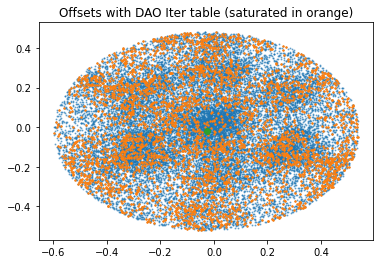

In [103]:
pl.title("Offsets with DAO Iter table (saturated in orange)")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(dra_s, ddec_s, s=2, alpha=1)
pl.scatter(np.median(dra), np.median(ddec));

## Try to match saturated star centroids

In [104]:
satcrd = satstarcat['skycoord_fit']
idx_s, sidx_s, sep_s, sep3d_s = satcrd.search_around_sky(vvvdr2_crds, 0.5*u.arcsec)
dra_s = (satcrd[sidx_s].ra - vvvdr2_crds[idx_s].ra).to(u.arcsec)
ddec_s = (satcrd[sidx_s].dec - vvvdr2_crds[idx_s].dec).to(u.arcsec)
len(idx_s), len(satcrd), len(vvvdr2_crds)

(242, 316, 4693)

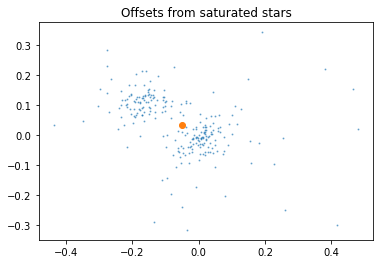

In [105]:
pl.title("Offsets from saturated stars")
pl.scatter(dra_s, ddec_s, s=1, alpha=0.5)
pl.scatter(np.median(dra_s), np.median(ddec_s));

In [106]:
# for each coordinate in DAO catalog, find VVV match (for plotting)
daoitercrd_nosat = daoitertbl_nosat['skycoord_centroid']
idx, sidx, sep, sep3d = daoitercrd_nosat.search_around_sky(vvvdr2_crds, 0.5*u.arcsec)
dra = (daoitercrd_nosat[sidx].ra - vvvdr2_crds[idx].ra).to(u.arcsec)
ddec = (daoitercrd_nosat[sidx].dec - vvvdr2_crds[idx].dec).to(u.arcsec)
len(idx), len(daoitercrd), len(vvvdr2_crds)

(22706, 161311, 4693)

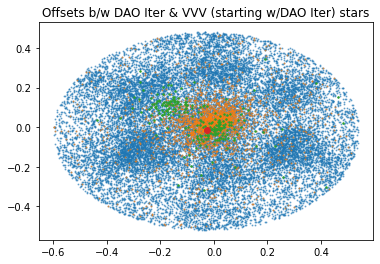

In [107]:
pl.title("Offsets b/w DAO Iter & VVV (starting w/DAO Iter) stars")
pl.scatter(dra, ddec, s=1, alpha=0.5)
bright = daoitertbl_nosat['flux_fit'][sidx] > 1e4
pl.scatter(dra[bright], ddec[bright], s=1, alpha=0.5)
pl.scatter(dra_s, ddec_s, s=2, alpha=1)
pl.scatter(np.median(dra), np.median(ddec));

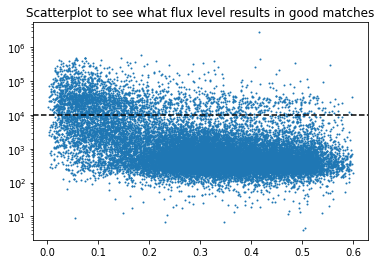

In [108]:
pl.title("Scatterplot to see what flux level results in good matches")
pl.scatter((dra**2 + ddec**2)**0.5, daoitertbl_nosat['flux_fit'][sidx], s=1)
pl.semilogy();
pl.axhline(1e4, color='k', linestyle='--');

In [109]:
# for each coordinate in DAO catalog, find VVV match (for saving)
daoitercrd_nosat = daoitertbl_nosat['skycoord_centroid']
bright = daoitertbl_nosat['flux_fit'] > 1e4
idxd, sepd, _ = daoitercrd_nosat[bright].match_to_catalog_sky(vvvdr2_crds)

drad = (daoitercrd_nosat[bright].ra - vvvdr2_crds[idxd].ra).to(u.arcsec)
ddecd = (daoitercrd_nosat[bright].dec - vvvdr2_crds[idxd].dec).to(u.arcsec)

# then, for each vvv object, find the closest DAO
idxv, sepv, _ = vvvdr2_crds.match_to_catalog_sky(daoitercrd_nosat[bright])
drav = (daoitercrd_nosat[bright][idxv].ra - vvvdr2_crds.ra).to(u.arcsec)
ddecv = (daoitercrd_nosat[bright][idxv].dec - vvvdr2_crds.dec).to(u.arcsec)

len(idxd), len(idxv), bright.sum(), len(vvvdr2_crds)

(4831, 4693, 4831, 4693)

(-0.5, 0.5, -0.5, 0.5)

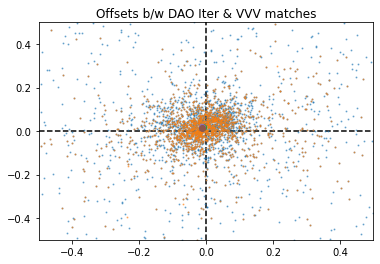

In [110]:
pl.title("Offsets b/w DAO Iter & VVV matches")
pl.scatter(drad, ddecd, s=1, alpha=0.5)
pl.scatter(drav, ddecv, s=1, alpha=0.5)
pl.scatter(np.median(drad), np.median(ddecd));
pl.scatter(np.median(drav), np.median(ddecv));
pl.scatter(np.median(drad[sepd<0.15*u.arcsec]), np.median(ddecd[sepd<0.15*u.arcsec]));
pl.scatter(np.median(drav[sepv<0.15*u.arcsec]), np.median(ddecv[sepv<0.15*u.arcsec]));
pl.axhline(0, color='k', linestyle='--', zorder=-5)
pl.axvline(0, color='k', linestyle='--', zorder=-5);
pl.axis([-0.5,0.5,-0.5,0.5])

In [ ]:
Table.read('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_vvvcat.ecsv').write('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_vvvcat.fits')

# Conclusions again: There's no offset?

So, what the hell?  Why do the catalogs _look_ so offset when overlaid on the data?

Maybe it's just that the catalogs have never run to completion on the final data.